In [2]:
#import necessary modules
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime
from matplotlib import dates as mpl_dates
import matplotlib.ticker as ticker
import matplotlib.dates as mdates

(720, 1280, 4)


(-0.5, 1279.5, 719.5, -0.5)

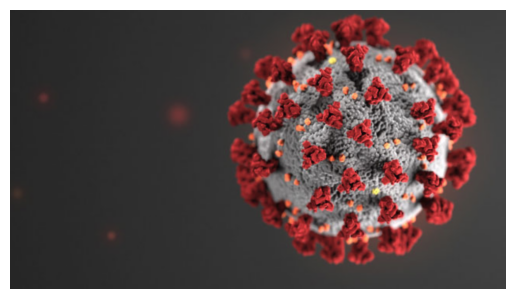

In [43]:
# Load the image into an array: img
img= plt.imread('covid.jpg')

# Print the shape of the image
print(img.shape)

#plot image and remove axis
plt.imshow(img)
plt.axis('off')

In [3]:
# reading in the dataframe
df = pd.read_csv('owid-covid-data.csv', parse_dates=['date'])
#print the first 5 rows
print(df.head())
# looking at the columns
df.info()

  iso_code continent     location       date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan 2020-02-24          1.0        1.0   
1      AFG      Asia  Afghanistan 2020-02-25          1.0        0.0   
2      AFG      Asia  Afghanistan 2020-02-26          1.0        0.0   
3      AFG      Asia  Afghanistan 2020-02-27          1.0        0.0   
4      AFG      Asia  Afghanistan 2020-02-28          1.0        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           NaN         NaN                  NaN  ...   
1                 NaN           NaN         NaN                  NaN  ...   
2                 NaN           NaN         NaN                  NaN  ...   
3                 NaN           NaN         NaN                  NaN  ...   
4                 NaN           NaN         NaN                  NaN  ...   

   gdp_per_capita  extreme_poverty  cardiovasc_death_rate  \
0        1803.987              NaN         

In [4]:
# making two variables one that is only the World
World= df[df.location == 'World']
#And one not including the world
df= df[df.location != 'World']

In [5]:
#Seeing the amount of deaths caused by covid 19
World.total_deaths.max()

2525401.0

In [6]:
# good thing we have help on the way with vaccines, trying to find on what date the World has met 10 million vaccinations
World.groupby('date').total_vaccinations.max().sort_values(ascending=False).iloc[1:50]


date
2021-02-26    235222629.0
2021-02-25    228977917.0
2021-02-24    223004361.0
2021-02-23    217435160.0
2021-02-22    212900673.0
2021-02-21    209286623.0
2021-02-20    206099148.0
2021-02-19    201547864.0
2021-02-18    196018868.0
2021-02-17    189804713.0
2021-02-16    184907588.0
2021-02-15    179102553.0
2021-02-14    175955619.0
2021-02-13    172145360.0
2021-02-12    167108102.0
2021-02-11    161471622.0
2021-02-10    156593950.0
2021-02-09    148793832.0
2021-02-08    136033031.0
2021-02-07    132708588.0
2021-02-06    129281410.0
2021-02-05    124753603.0
2021-02-04    121011592.0
2021-02-03    116218247.0
2021-02-02    105331528.0
2021-02-01    102760596.0
2021-01-31     99739995.0
2021-01-30     95464831.0
2021-01-29     91796493.0
2021-01-28     87526745.0
2021-01-27     83280273.0
2021-01-26     72121607.0
2021-01-25     69539485.0
2021-01-24     66842608.0
2021-01-23     64221118.0
2021-01-22     61260882.0
2021-01-21     57547286.0
2021-01-20     54426685.0
2021-01

Text(0.5, 1.0, 'World New Cases')

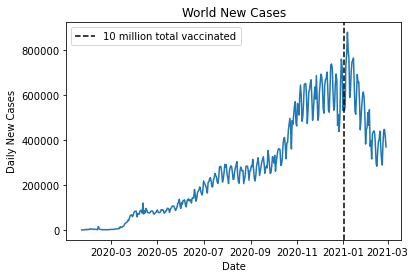

In [7]:
# plotting the effects of vaccinations has on new cases
plt.plot(World.date, World.new_cases)
#creating the variable when the World reached 10 million total vaccinations
x=datetime.datetime(2021, 1, 2)
#adding the vertical line to symbolize 10 million total vaccinations was hit
plt.axvline(x, linestyle='--', color='black', label='10 million total vaccinated')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Daily New Cases')
plt.title('World New Cases')
#Good trend, the vaccines are causing new daily cases to decrease

In [8]:
# I want to know what are top 5 countries in covid cases
df.groupby('location').total_cases.max().sort_values(ascending=False).iloc[1:11]

location
North America     32824067.0
United States     28554465.0
Asia              24954194.0
European Union    22344157.0
South America     17919846.0
India             11096731.0
Brazil            10517232.0
Russia             4187166.0
United Kingdom     4182772.0
Africa             3887893.0
Name: total_cases, dtype: float64

In [9]:
# setting variable to each country
USA = df[df.location == 'United States']
India = df[df.location == 'India']
Brazil= df[df.location== 'Brazil']
Russia= df[df.location=='Russia']
UK= df[df.location=='United Kingdom']

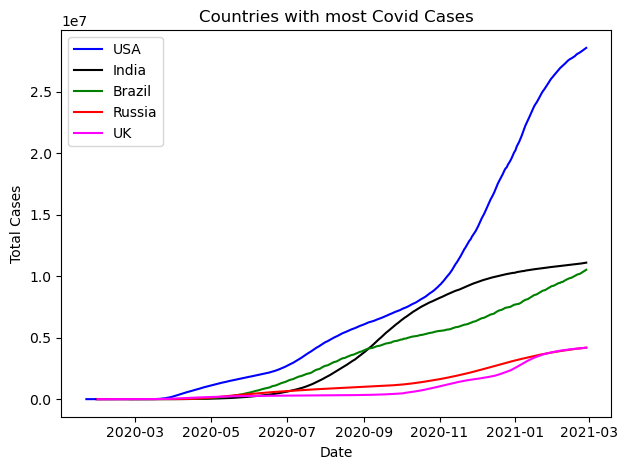

In [41]:
# I want to plot the top 5 countries with most covid 19 cases and compare them
plt.style.use('default')
plt.plot(USA.date, USA.total_cases, color='blue', label='USA')
plt.plot(India.date, India.total_cases, color='black', label='India')
plt.plot(Brazil.date, Brazil.total_cases, color='green', label='Brazil')
plt.plot(Russia.date, Russia.total_cases, color='red', label='Russia')
plt.plot(UK.date, UK.total_cases, color='magenta', label='UK')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.title('Countries with most Covid Cases')
plt.tight_layout()
plt.legend()

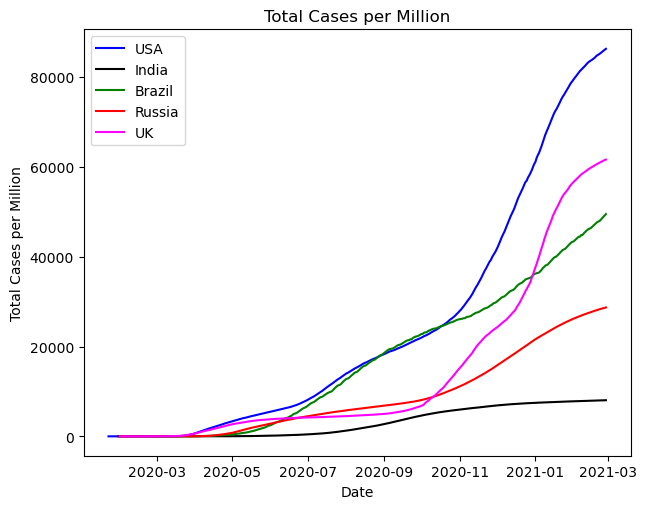

In [40]:
# although the graph above shows the USA completely ahead of every other Country this could be due to the USA great population
# now lets compare total cases per million. This takes into place popluation
plt.plot(USA.date, USA.total_cases_per_million, color='blue', label='USA')
plt.plot(India.date, India.total_cases_per_million, color='black', label='India')
plt.plot(Brazil.date, Brazil.total_cases_per_million, color='green', label='Brazil')
plt.plot(Russia.date, Russia.total_cases_per_million, color='red', label='Russia')
plt.plot(UK.date, UK.total_cases_per_million, color='magenta', label='UK')
plt.tight_layout()
plt.xlabel('Date')
plt.ylabel('Total Cases per Million')
plt.title('Total Cases per Million')
plt.legend()
# USA still ahead although the gap has gotten closer

In [12]:
# alot of people claim the more you test the more cases you will find, so I wanted to see the test positive rate for each country
# The lower number the better, if your country has alot of cases but low positive rate this the testing claim is valid
USA['pos_rate']= np.mean(USA.total_cases/ USA.total_tests *100)
India['pos_rate']= np.mean(India.total_cases/India.total_tests * 100)
Brazil['pos_rate']= np.mean(Brazil.total_cases/Brazil.total_tests * 100)
Russia['pos_rate']= np.mean(Russia.total_cases/Russia.total_tests * 100)
UK['pos_rate']= np.mean(UK.total_cases/UK.total_tests*100)

print('USA', USA.pos_rate)
print('India', India.pos_rate)
print('Brazil', Brazil.pos_rate)
print('Russia', Russia.pos_rate)
print('UK', UK.pos_rate.sort_values(ascending=False))
# Russia has the lowest positivate rates but I have concluded that data reported for test could be skewed due to Brazil having a 74%

USA 67949    8.387842
67950    8.387842
67951    8.387842
67952    8.387842
67953    8.387842
           ...   
68347    8.387842
68348    8.387842
68349    8.387842
68350    8.387842
68351    8.387842
Name: pos_rate, Length: 403, dtype: float64
India 29447    6.575145
29448    6.575145
29449    6.575145
29450    6.575145
29451    6.575145
           ...   
29837    6.575145
29838    6.575145
29839    6.575145
29840    6.575145
29841    6.575145
Name: pos_rate, Length: 395, dtype: float64
Brazil 9211    73.999175
9212    73.999175
9213    73.999175
9214    73.999175
9215    73.999175
          ...    
9574    73.999175
9575    73.999175
9576    73.999175
9577    73.999175
9578    73.999175
Name: pos_rate, Length: 368, dtype: float64
Russia 53038    2.798192
53039    2.798192
53040    2.798192
53041    2.798192
53042    2.798192
           ...   
53427    2.798192
53428    2.798192
53429    2.798192
53430    2.798192
53431    2.798192
Name: pos_rate, Length: 394, dtype: float64
UK 67948

<ipython-input-12-260cbfbb8f89>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  USA['pos_rate']= np.mean(USA.total_cases/ USA.total_tests *100)
<ipython-input-12-260cbfbb8f89>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  India['pos_rate']= np.mean(India.total_cases/India.total_tests * 100)
<ipython-input-12-260cbfbb8f89>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

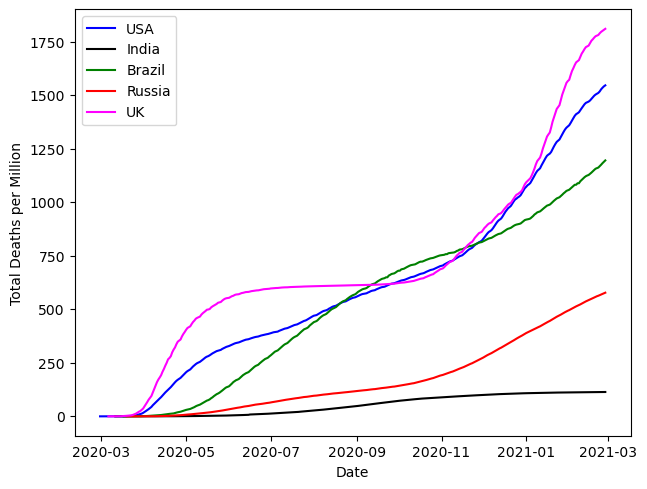

In [39]:
# Now what about deaths. This is something every country would love to be as little as possible
plt.plot(USA.date, USA.total_deaths_per_million, color='blue', label='USA')
plt.plot(India.date, India.total_deaths_per_million, color='black', label='India')
plt.plot(Brazil.date, Brazil.total_deaths_per_million, color='green', label='Brazil')
plt.plot(Russia.date, Russia.total_deaths_per_million, color='red', label='Russia')
plt.plot(UK.date, UK.total_deaths_per_million, color='magenta', label='UK')
plt.tight_layout()
plt.xlabel('Date')
plt.ylabel('Total Deaths per Million')
plt.legend()
# Now this is interseting, UK has the highest death toll in term of population size
# Since we all know age 65 and up are more vulnerable I wanted to look into thisb

In [14]:
# checking the % of the popluation for each country that are over 65
print(USA.aged_65_older)
print(India.aged_65_older)
print(UK.aged_65_older)
print(Brazil.aged_65_older)
print(Russia.aged_65_older)



67949    15.413
67950    15.413
67951    15.413
67952    15.413
67953    15.413
          ...  
68347    15.413
68348    15.413
68349    15.413
68350    15.413
68351    15.413
Name: aged_65_older, Length: 403, dtype: float64
29447    5.989
29448    5.989
29449    5.989
29450    5.989
29451    5.989
         ...  
29837    5.989
29838    5.989
29839    5.989
29840    5.989
29841    5.989
Name: aged_65_older, Length: 395, dtype: float64
67555    18.517
67556    18.517
67557    18.517
67558    18.517
67559    18.517
          ...  
67944    18.517
67945    18.517
67946    18.517
67947    18.517
67948    18.517
Name: aged_65_older, Length: 394, dtype: float64
9211    8.552
9212    8.552
9213    8.552
9214    8.552
9215    8.552
        ...  
9574    8.552
9575    8.552
9576    8.552
9577    8.552
9578    8.552
Name: aged_65_older, Length: 368, dtype: float64
53038    14.178
53039    14.178
53040    14.178
53041    14.178
53042    14.178
          ...  
53427    14.178
53428    14.178
53429

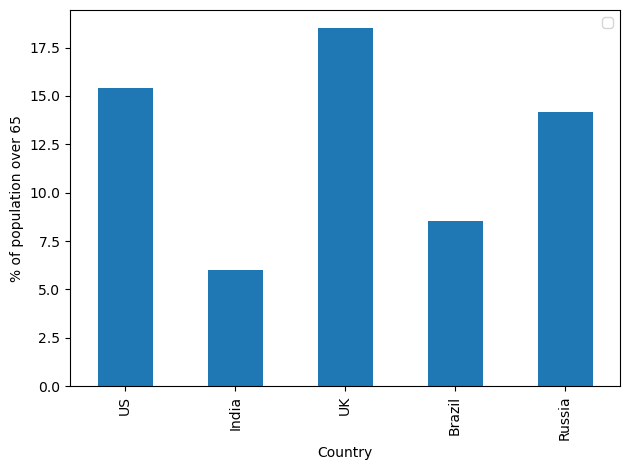

In [15]:
# I want to create a DataFrame with each Country and the % of the popluation over 65. First I creat a dictionary
age = {
    'Country': ['US', 'India', 'UK','Brazil', 'Russia'],
    'Age': [15.413, 5.989, 18.517, 8.552, 14.178]
}
# Turn it into a dataframe using pandas function
age= pd.DataFrame(age)
#plot a bar graph
age.plot.bar('Country', 'Age')
plt.ylabel('% of population over 65')
plt.legend('')
plt.tight_layout()
# This could be the reason of the USA and UK high death toll. They have a great popluation over 65 as oppose to India who faired well in the deaths per millions graph

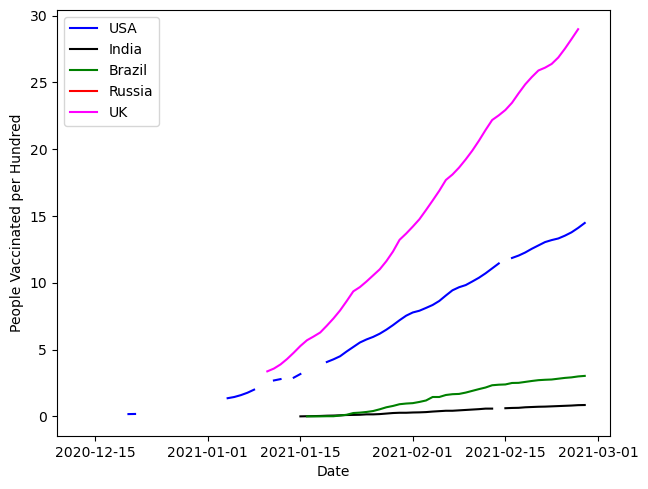

In [42]:
# good thing help is on the way with vaccines, now which of these Country has done the best with vaccinated the most people?
plt.plot(USA.date, USA.people_vaccinated_per_hundred, color='blue', label='USA')
plt.plot(India.date, India.people_vaccinated_per_hundred, color='black', label='India')
plt.plot(Brazil.date, Brazil.people_vaccinated_per_hundred, color='green', label='Brazil')
plt.plot(Russia.date, Russia.people_vaccinated_per_hundred, color='red', label='Russia')
plt.plot(UK.date, UK.people_vaccinated_per_hundred, color='magenta', label='UK')
plt.tight_layout()
plt.xlabel('Date')
plt.ylabel('People Vaccinated per Hundred')
plt.legend()
# The UK has done a great job, and the USA is doing a good job as well.

In [17]:
# Now i want to run a corrleation to see how much of these variables are effected of each other
# I want to see how new cases, new tests, new deaths, and people vaccinated per hundred are corrleated to each other
columns= ['new_cases', 'new_tests', 'new_deaths', 'people_vaccinated_per_hundred' ]
# This is only for the US
subset= USA[columns]
print(subset.corr())
# new cases, new tests, and new deaths are all strongly corrleated. 
# Good news is vaccines are working, they are strongly negatively corrleated with new cases
# It is also negatively corrleated with new deaths and this is good news as well
# Go get your vaccine 

                               new_cases  new_tests  new_deaths  \
new_cases                       1.000000   0.859085    0.701466   
new_tests                       0.859085   1.000000    0.618993   
new_deaths                      0.701466   0.618993    1.000000   
people_vaccinated_per_hundred  -0.916427  -0.569300   -0.376846   

                               people_vaccinated_per_hundred  
new_cases                                          -0.916427  
new_tests                                          -0.569300  
new_deaths                                         -0.376846  
people_vaccinated_per_hundred                       1.000000  


In [18]:
from scipy.stats import linregress

# More stats testing, based on how new tests and new cases are corrleated
# Extract the variables
subset = USA.dropna(subset=['new_tests', 'new_cases'])
xs = subset['new_tests']
ys = subset['new_cases']

# Compute the linear regression
res = linregress(xs, ys)
print(res)

LinregressResult(slope=0.10320184497551772, intercept=-15640.104089123692, rvalue=0.8590848456110979, pvalue=3.615923201113968e-106, stderr=0.003249663150429513)


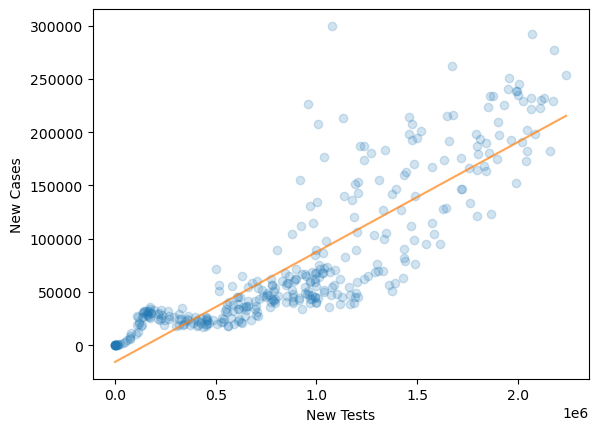

In [38]:
# Plot the scatter plot
plt.clf()
x_jitter = xs + np.random.normal(0, 0.15, len(xs))
plt.plot(x_jitter, ys, 'o', alpha=0.2)

# Plot the line of best fit
fx = np.array([xs.min(), xs.max()])
fy = res.intercept + res.slope * fx
plt.plot(fx, fy, '-', alpha=0.7)
plt.xlabel('New Tests')
plt.ylabel('New Cases')
plt.show()

In [20]:
# set the relationships between each variable
import statsmodels.formula.api as smf
results = smf.ols('new_cases ~ new_tests + new_deaths + population_density', data=USA).fit()
# Print the estimated parameters
print(results.params)

Intercept             -18.862645
new_tests               0.082253
new_deaths             19.627170
population_density   -671.661050
dtype: float64


In [21]:
# Now I want focus on the US
# On what date did they reach 10 million people vaccinated
USA.groupby('date').people_vaccinated.value_counts()

date        people_vaccinated
2020-12-20  556208.0             1
2020-12-21  614117.0             1
2020-12-23  1008025.0            1
2020-12-26  1944585.0            1
2020-12-28  2127143.0            1
2020-12-30  2794588.0            1
2021-01-02  4225756.0            1
2021-01-04  4563260.0            1
2021-01-05  4836469.0            1
2021-01-06  5306797.0            1
2021-01-07  5919418.0            1
2021-01-08  6688231.0            1
2021-01-11  8987322.0            1
2021-01-12  9327138.0            1
2021-01-14  9690757.0            1
2021-01-15  10595866.0           1
2021-01-19  13595803.0           1
2021-01-20  14270441.0           1
2021-01-21  15053257.0           1
2021-01-22  16243093.0           1
2021-01-23  17390345.0           1
2021-01-24  18502131.0           1
2021-01-25  19252279.0           1
2021-01-26  19902237.0           1
2021-01-27  20687970.0           1
2021-01-28  21698606.0           1
2021-01-29  22858318.0           1
2021-01-30  24064165.0   

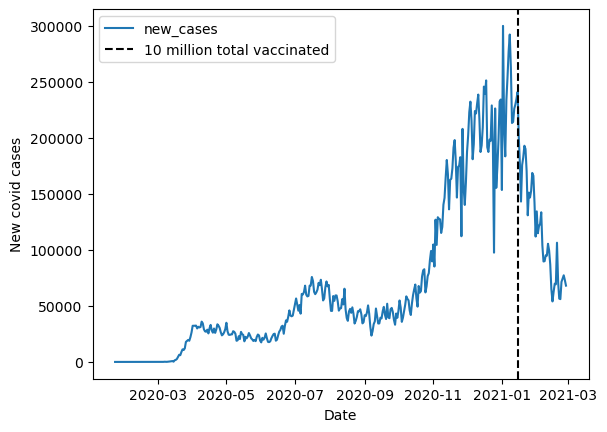

In [22]:
plt.style.use('default')
#a graph showing the positive effect the vaccines have had on daily new cases
fig, ax= plt.subplots()
ax.plot('date', 'new_cases', data=USA)
#ax.scatter('date')
x=datetime.datetime(2021, 1, 15)
plt.axvline(x, linestyle='--', color='black', label='10 million total vaccinated')
plt.xlabel('Date')
plt.ylabel('New covid cases')
plt.legend(loc='upper left')

In [23]:
#df.plot(kind='bar', x='date', y='new_cases')
#plt.tight_layout()
#plt.gcf().autofmt_xdate()
#plt.xaxis.set_major_locator(months)
#plt.axvline(112, linestyle='--', color='r', label='1 million total vaccinated')
#plt.legend(bbox_to_anchor=(1.0, 1), loc='upper left')

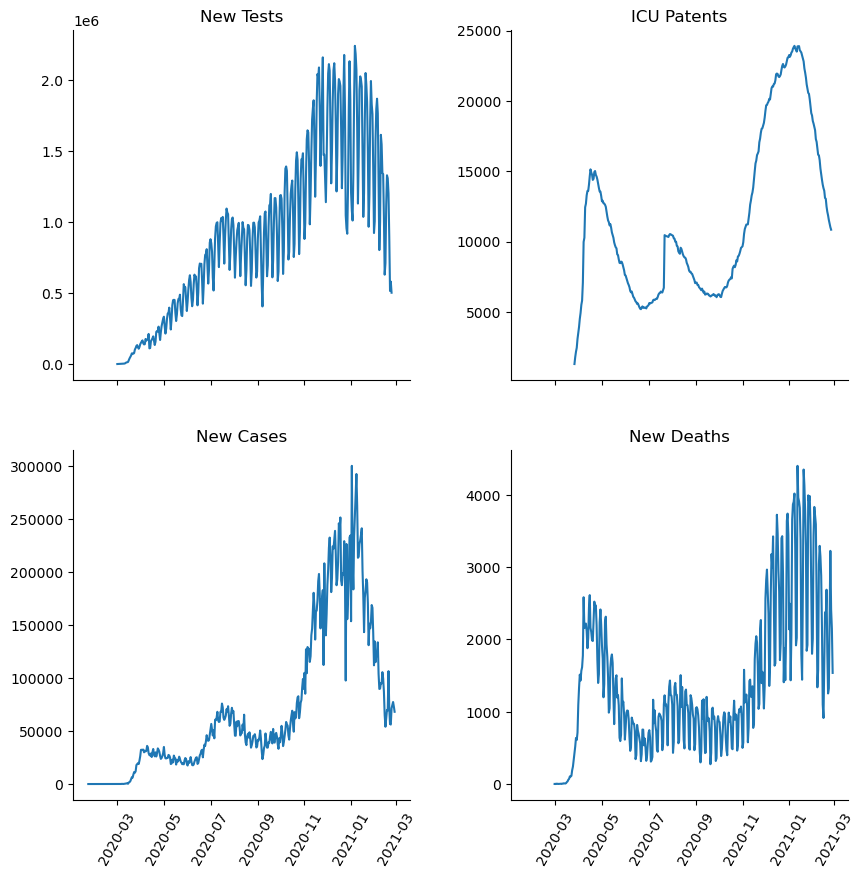

In [24]:
# Now I want to compare how the USA is been doing
# I want to compare the 4 key variable in the fight against covid 19
# plotting new tests, new cases, new deaths, and ICU patents
fig, axes= plt.subplots(2,2,figsize=(10,10),gridspec_kw={'hspace':0.2}, sharex=True)
axes[0,0].plot(USA.date, USA.new_tests)
axes[0,0].set_title('New Tests')
axes[1,0].plot(USA.date, USA.new_cases)
axes[1,0].set_title('New Cases')
axes[1,1].plot(USA.date, USA.new_deaths)
axes[1,1].set_title('New Deaths')
axes[0,1].plot(USA.date, USA.icu_patients)
axes[0,1].set_title('ICU Patents')
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=60)
sns.despine(left=False, bottom=False)
fig.subplots_adjust(left=None, bottom=None, right=None, wspace=0.3, hspace=None)
# looks like we are in a good trend
# you would like to see new tests to continue to rise, but people may not be taking tests because they have no reason to 
# great seeing new daily cases and ICU patents dropping
# deaths are going down as well but they tend to lag 2 weeks with new cases

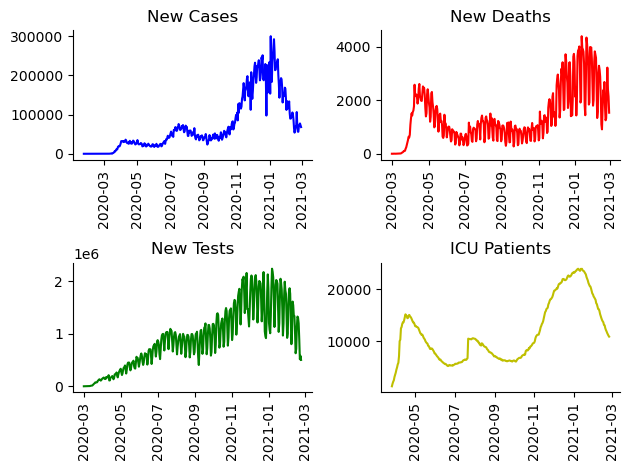

In [25]:
# same graph as above just a different way to see it
plt.style.use('default')
plt.subplot(2,2,1)
plt.plot(USA.date, USA.new_cases, color='b')
plt.title('New Cases')
plt.xticks(rotation=90)

plt.subplot(2,2,2)
plt.plot(USA.date, USA.new_deaths, color='r')
plt.title('New Deaths')
plt.xticks(rotation=90)

plt.subplot(2,2,3)
plt.plot(USA.date, USA.new_tests, color='g')
plt.title('New Tests')
plt.xticks(label=USA.date, rotation=90)
plt.tight_layout()

plt.subplot(2,2,4)
plt.plot(USA.date, USA.icu_patients, color='y')
plt.title('ICU Patients')
plt.xticks(rotation=90)
plt.tight_layout()
sns.despine(left=False, bottom=False)
plt.show()

In [26]:
# creating new columsn negative and positive tests
df['negative_tests']= df.new_tests- df.new_cases
df['positive_tests']= df.new_tests- df.negative_tests

In [27]:
# Define a function called plot_timeseries
def plot_timeseries(axes, x, y, color, xlabel, ylabel):

  # Plot the inputs x,y in the provided color
  axes.plot(x, y, color=color)

  # Set the x-axis label
  axes.set_xlabel(xlabel)

  # Set the y-axis label
  axes.set_ylabel(ylabel, color=color)

  # Set the colors tick params for y-axis
  axes.tick_params('y', colors=color)

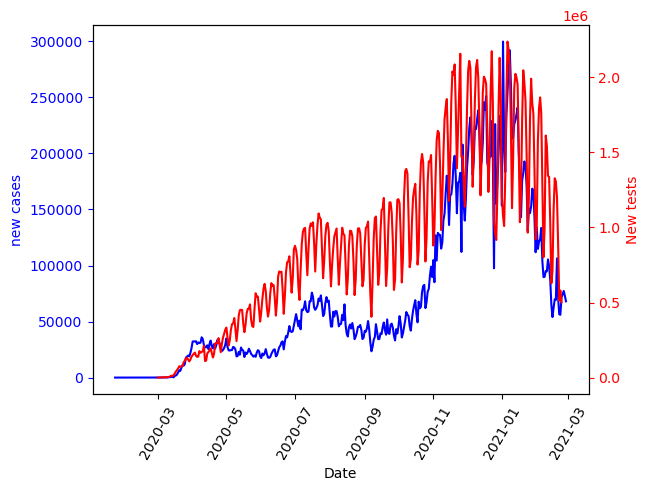

In [28]:
# creating a graph to show the comparison again with new tests and new cases
plt.style.use('default')
fig, ax = plt.subplots()

# Plot the CO2 levels time-series in blue
plot_timeseries(ax, USA.date, USA["new_cases"], 'blue', "Date", "new cases")

# Create a twin Axes object that shares the x-axis
ax2 = ax.twinx()

# Plot the relative temperature data in red
plot_timeseries(ax2, USA.date, USA['new_tests'], 'red', "Date", "New tests")
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=60)
plt.show()
# they seem to follow the same trend
# Since the US tests so much this could be a reason for high new cases

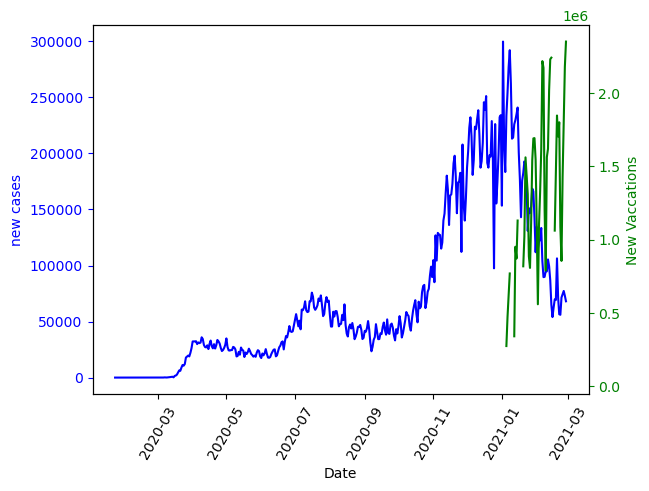

In [29]:
# A great graph showing the great effects the vaccine has had on new cases
plt.style.use('default')
fig, ax = plt.subplots()

# Plot the CO2 levels time-series in blue
plot_timeseries(ax, USA.date, USA["new_cases"], 'blue', "Date", "new cases")

# Create a twin Axes object that shares the x-axis
ax2 = ax.twinx()

# Plot the relative temperature data in red
plot_timeseries(ax2, USA.date, USA['new_vaccinations'], 'green', "Date", "New Vaccations")
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=60)
plt.show()
# as vaccines are going up new cases are dropping. This is just great news

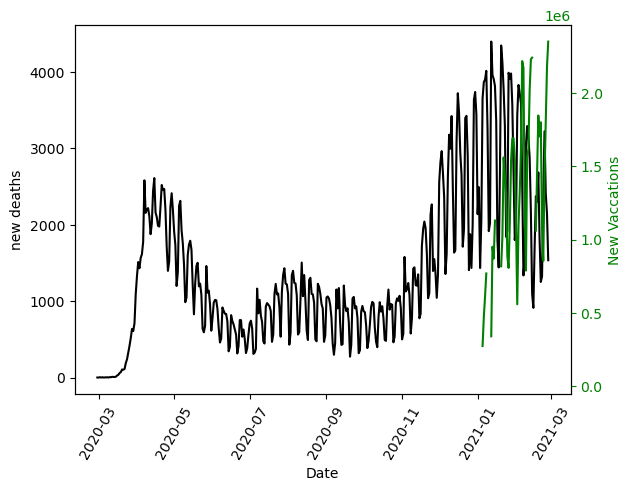

In [30]:
# graph showing the effects of the vaccine on new deaths
plt.style.use('default')
fig, ax = plt.subplots()

# Plot the CO2 levels time-series in blue
plot_timeseries(ax, USA.date, USA["new_deaths"], 'black', "Date", "new deaths")

# Create a twin Axes object that shares the x-axis
ax2 = ax.twinx()

# Plot the relative temperature data in red
plot_timeseries(ax2, USA.date, USA['new_vaccinations'], 'green', "Date", "New Vaccations")
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=60)
plt.show()
# although it is not as strongly corrleated, the vaccine is still bringing down the death toll

In [31]:
# creating variable for each month for the past year
march= USA[((USA.date >= datetime.datetime(2020, 3, 1)) & (USA.date < datetime.datetime(2020, 4, 1)))]
april= USA[((USA.date >= datetime.datetime(2020, 4, 1)) & (USA.date < datetime.datetime(2020, 5, 1)))]
may= USA[((USA.date >= datetime.datetime(2020, 5, 1)) & (USA.date < datetime.datetime(2020, 6, 1)))]
june= USA[((USA.date >= datetime.datetime(2020, 6, 1)) & (USA.date < datetime.datetime(2020, 7, 1)))]
july= USA[((USA.date >= datetime.datetime(2020, 7, 1)) & (USA.date < datetime.datetime(2020, 8, 1)))]
august= USA[((USA.date >= datetime.datetime(2020, 8, 1)) & (USA.date < datetime.datetime(2020, 9, 1)))]
sep= USA[((USA.date >= datetime.datetime(2020, 9, 1)) & (USA.date < datetime.datetime(2020, 10, 1)))]
october= USA[((USA.date >= datetime.datetime(2020, 10, 1)) & (USA.date < datetime.datetime(2020, 11, 1)))]
nov= USA[((USA.date >= datetime.datetime(2020, 11, 1)) & (USA.date < datetime.datetime(2020, 12, 1)))]
dec= USA[((USA.date >= datetime.datetime(2020, 12, 1)) & (USA.date < datetime.datetime(2021, 1, 1)))]
jan= USA[((USA.date >= datetime.datetime(2021, 1, 1)) & (USA.date < datetime.datetime(2021, 2, 1)))]
feb= USA[((USA.date >= datetime.datetime(2021, 2, 1)) & (USA.date < datetime.datetime(2021, 3, 1)))]

In [32]:

print('march new cases:', march.new_cases.mean())
print('march new tests:', march.new_tests.mean())

print('april new cases:',april.new_cases.mean())
print('april new tests:',april.new_tests.mean())


print('may new cases:',may.new_cases.mean())
print('may new tests:',may.new_tests.mean())

print('june new cases:',june.new_cases.mean())
print('june new tests:',june.new_tests.mean())

print('july new cases:',july.new_cases.mean())
print('july new tests:',july.new_tests.mean())

print('aug new cases:',august.new_cases.mean())
print('aug new tests:',august.new_tests.mean())

print('sep new cases:',sep.new_cases.mean())
print('sep new tests:',sep.new_tests.mean())

print('oct new cases:',october.new_cases.mean())
print('oct new tests:',october.new_tests.mean())

print('nov new cases:',nov.new_cases.mean())
print('nov new tests:',nov.new_tests.mean())

print('dec new cases:',dec.new_cases.mean())
print('dec new tests:',dec.new_tests.mean())

print('jan new cases:',jan.new_cases.mean())
print('jan new tests:',jan.new_tests.mean())

print('feb new cases:',feb.new_cases.mean())
print('feb new tests:',feb.new_tests.mean())

march new cases: 6202.451612903225
march new tests: 48524.1935483871
april new cases: 29623.933333333334
april new tests: 187544.46666666667
may new cases: 23151.41935483871
may new tests: 386523.6451612903
june new cases: 28112.266666666666
june new tests: 603950.1333333333
july new cases: 62091.93548387097
july new tests: 891352.2580645161
aug new cases: 47053.6129032258
aug new tests: 821248.2903225806
sep new cases: 40207.96666666667
sep new tests: 898057.6666666666
oct new cases: 62159.32258064516
oct new tests: 1142377.1612903227
nov new cases: 149881.63333333333
nov new tests: 1546619.1666666667
dec new cases: 206667.1935483871
dec new tests: 1705091.7096774194
jan new cases: 197584.90322580645
jan new tests: 1604060.5161290322
feb new cases: 87682.5925925926
feb new tests: 1162843.4782608696


In [35]:
# creating dataframe with the data above. Month, new cases mean, and new tests mean
month= {
    'Month':['March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December', 'January', 'Febraury'],
    'New Cases':[6202.451612903225, 29623.933333333334, 23151.41935483871, 28112.266666666666, 62091.93548387097, 47053.6129032258, 40207.96666666667, 62159.32258064516, 149881.63333333333, 206667.1935483871, 197584.90322580645, 87682.5925925926],
    'New Tests':[48432.54838709677, 187318.53333333333,385930.51612903224, 603457.7, 890521.9032258064, 820777.7419354839, 897086.8666666667, 1140997.322580645, 1546619.1666666667, 1705091.7096774194, 1604060.5161290322,    1162843.4782608696] 
}

df10= pd.DataFrame(month)
# adding new column positive rate
df10['positive_rate']= (df10['New Cases']/ df10['New Tests']*100)
print(df10)

        Month      New Cases     New Tests  positive_rate
0       March    6202.451613  4.843255e+04      12.806371
1       April   29623.933333  1.873185e+05      15.814737
2         May   23151.419355  3.859305e+05       5.998857
3        June   28112.266667  6.034577e+05       4.658531
4        July   62091.935484  8.905219e+05       6.972533
5      August   47053.612903  8.207777e+05       5.732808
6   September   40207.966667  8.970869e+05       4.482059
7     October   62159.322581  1.140997e+06       5.447806
8    November  149881.633333  1.546619e+06       9.690920
9    December  206667.193548  1.705092e+06      12.120591
10    January  197584.903226  1.604061e+06      12.317796
11   Febraury   87682.592593  1.162843e+06       7.540361


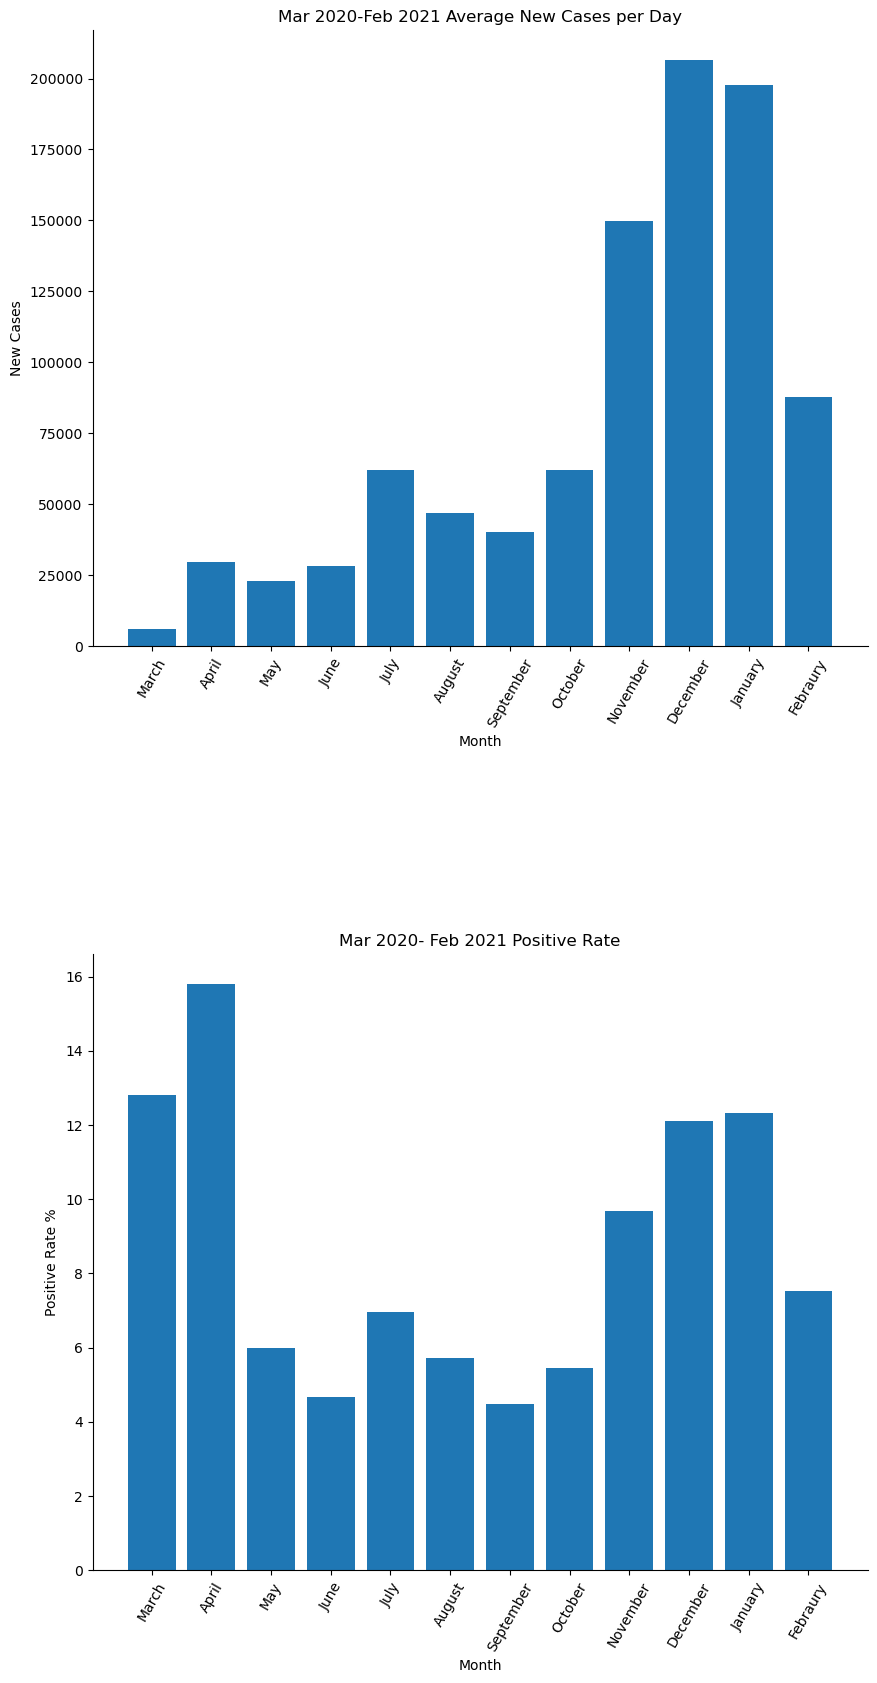

In [36]:
fig, ax= plt.subplots(nrows=2, ncols=1,figsize=(10,20),gridspec_kw={'hspace':0.5})
ax[0].bar(df10.Month, df10['New Cases'], label='New Cases')
ax[0].set_ylabel('New Cases')
ax[0].set_title('Mar 2020-Feb 2021 Average New Cases per Day')
ax[0].set_xlabel('Month')
ax[1].bar(df10.Month, df10.positive_rate)
ax[1].set_title('Mar 2020- Feb 2021 Positive Rate')
ax[1].set_ylabel('Positive Rate %')
ax[1].set_xlabel('Month')
sns.despine(left=False, bottom=False)
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=60)

In [ ]:
# the US is on a good trend new daily cases are going down and so is positive rate %